# Import Pustaka

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.metrics import precision_score, recall_score, f1_score

# Data Loading

In [3]:
df = pd.read_csv('/content/bank-additional-full.csv',sep = ";")
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


# Data Exploration

In [4]:
col_edit = df['y']
col_edit = col_edit.apply(lambda x:1 if x =='yes' else x)
col_edit = col_edit.apply(lambda x:0 if x =='no' else x)
col_edit = col_edit.fillna(0)
df.dropna(axis=0, how='any', inplace=True)
df.head()
df = df
df['y']=col_edit
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
num_cols = list(df.select_dtypes('number').drop(columns = ["y"]).columns)
target_cols = df['y']
cat_cols= list(df.select_dtypes(object))

In [7]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
df[cat_cols].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


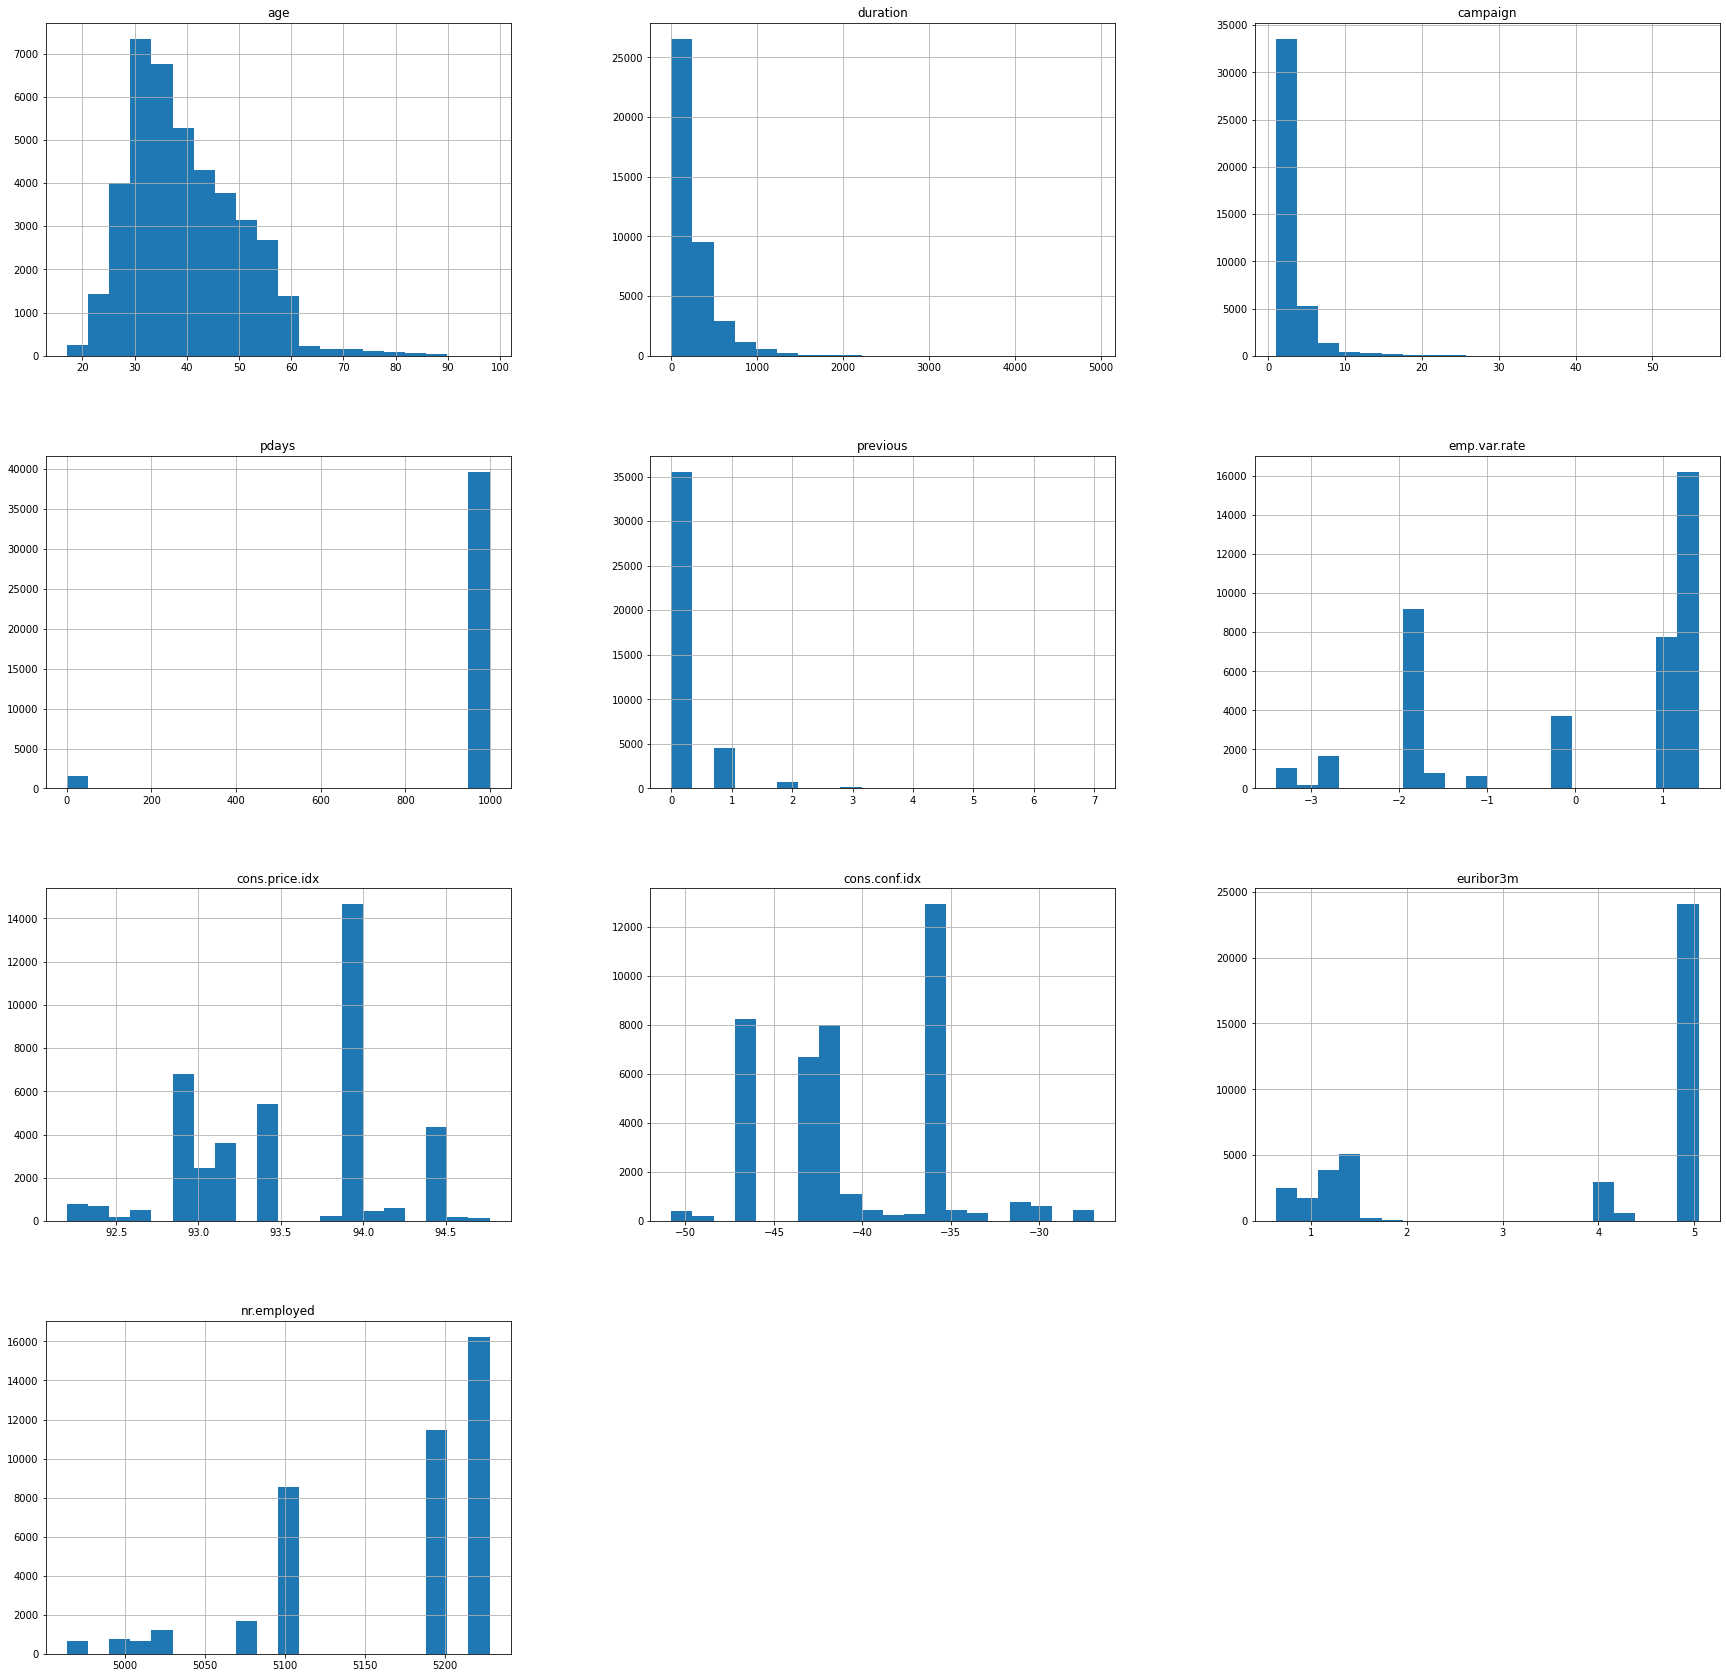

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
df[num_cols].hist(bins=20, figsize=(30, 30))
plt.show()

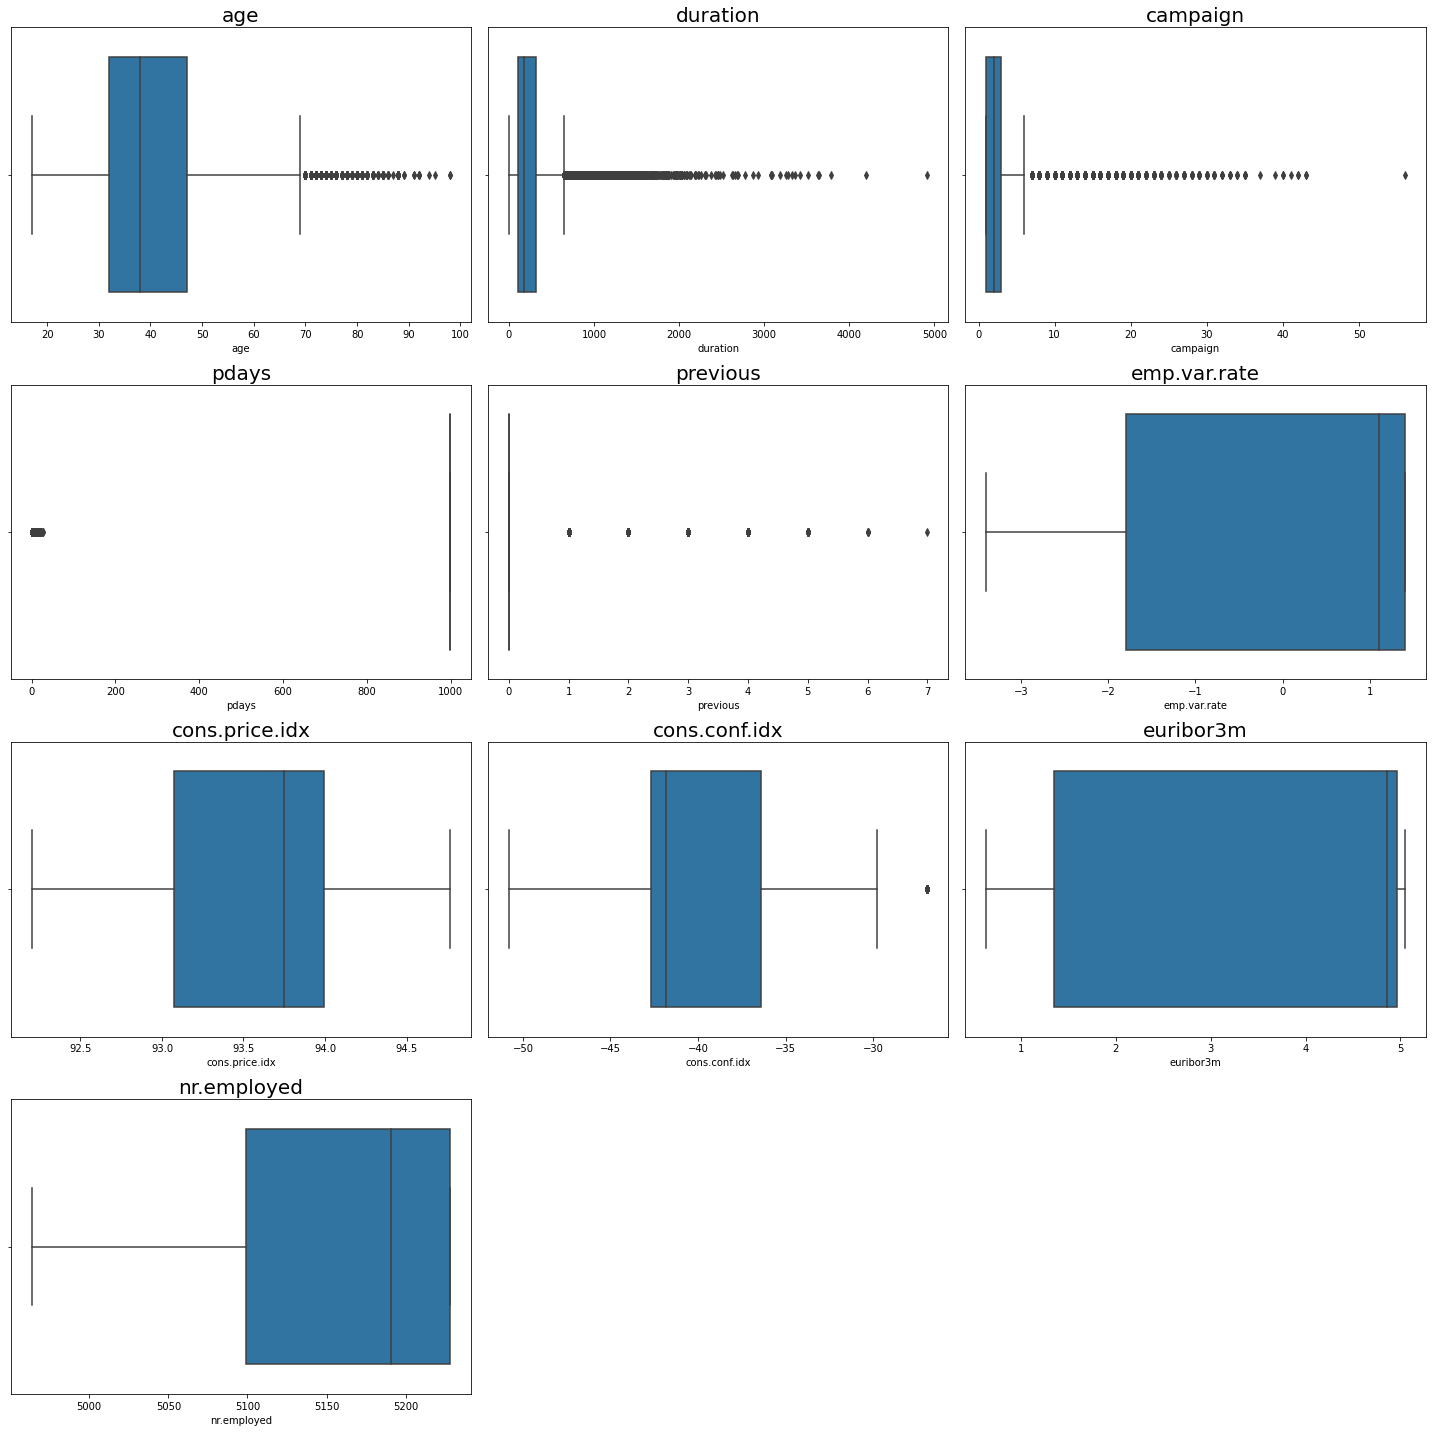

In [10]:
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

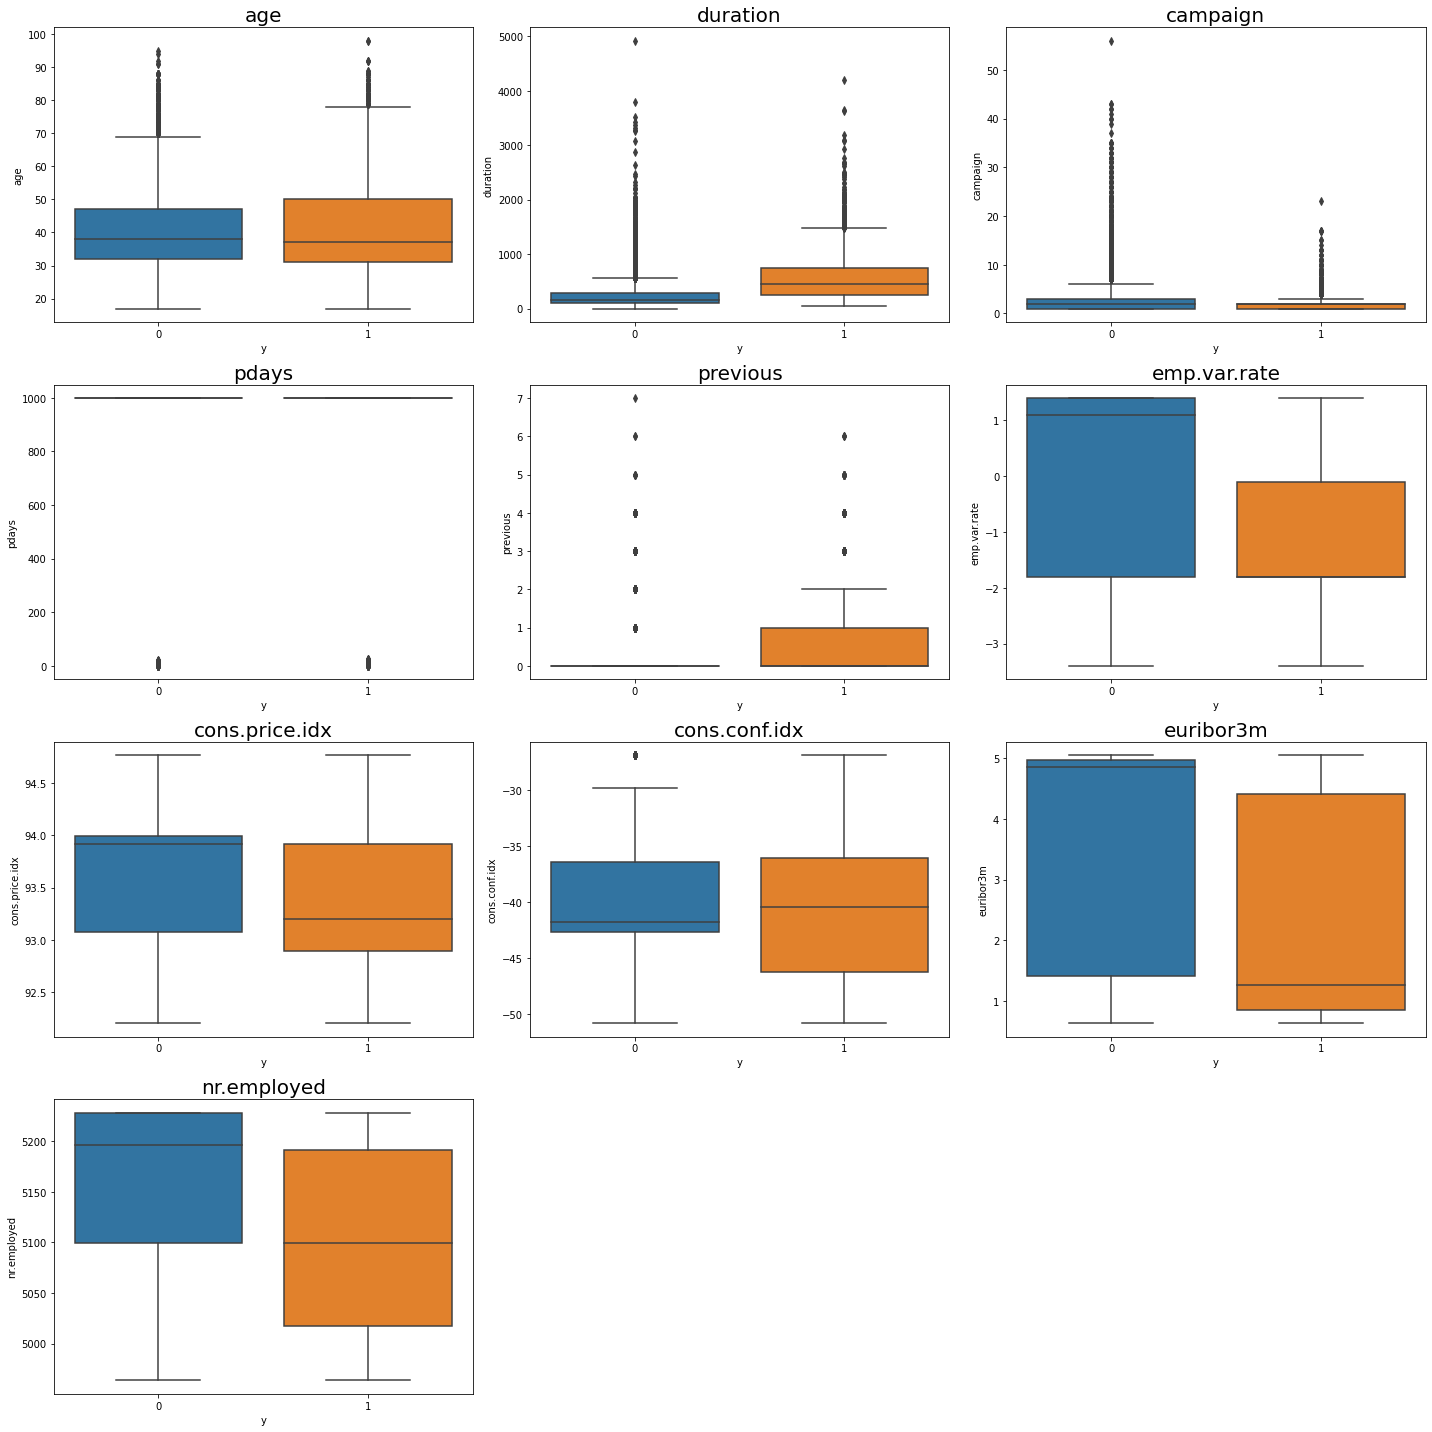

In [11]:
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(y = df[num_cols[i]], x = df['y'])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

# Data Cleaning

In [12]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

###### Tidak ada missing value

# Data Exploration EDA

### Numerical Feature

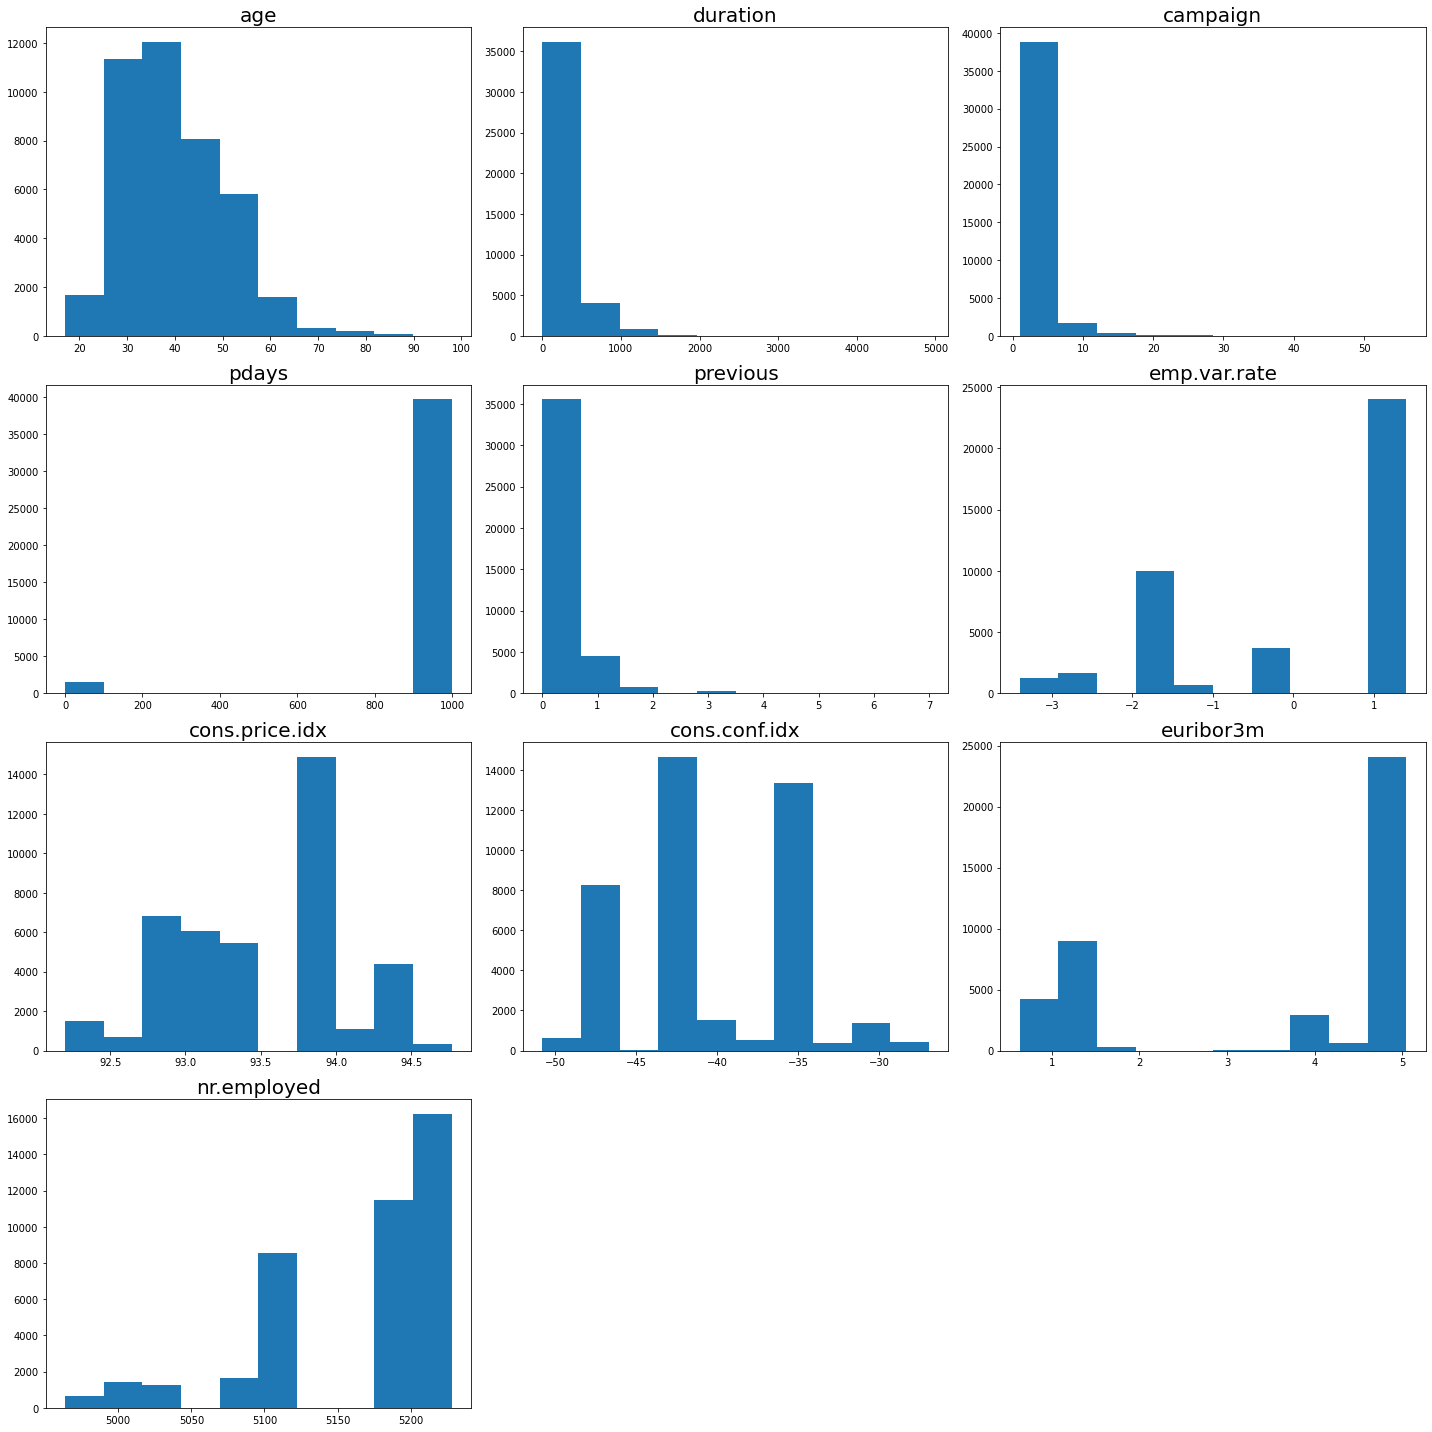

In [13]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    plt.hist(df[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

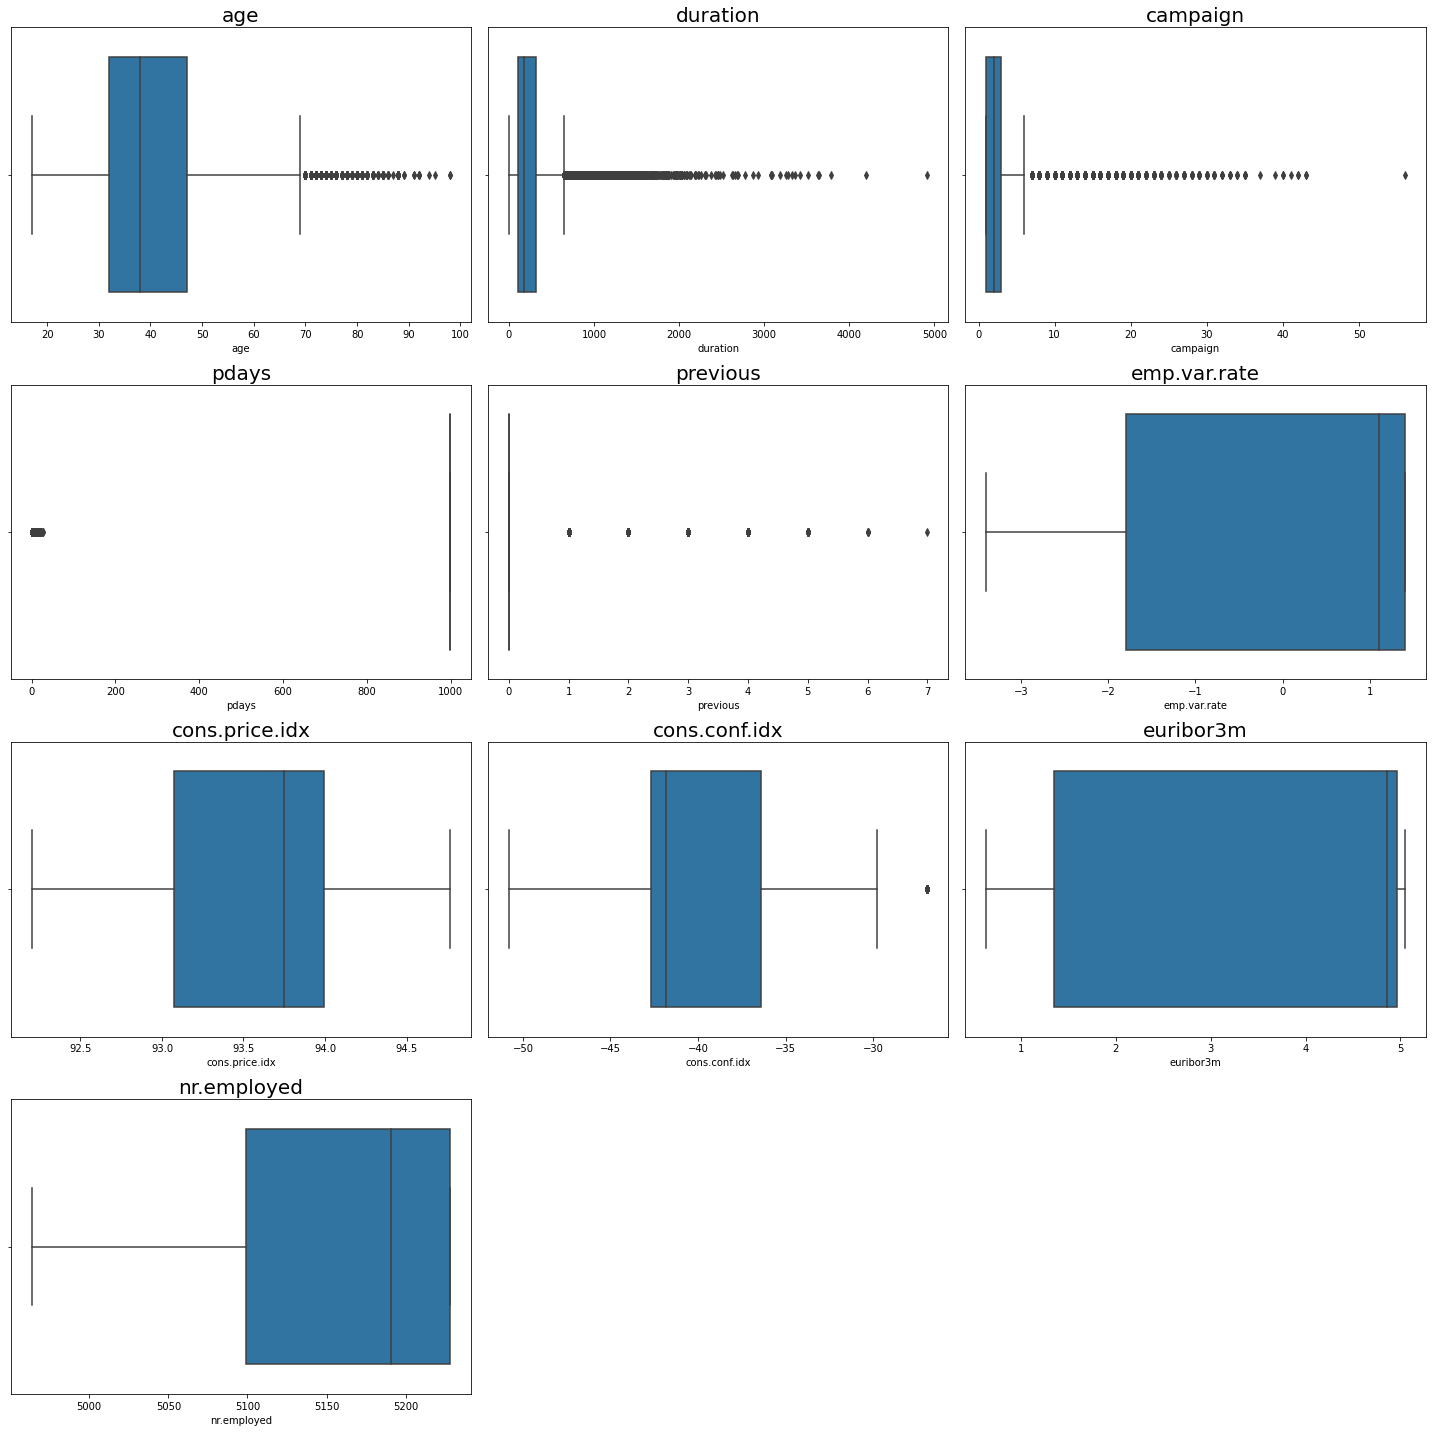

In [14]:
# plot all numerical features
plt.figure(figsize = (20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

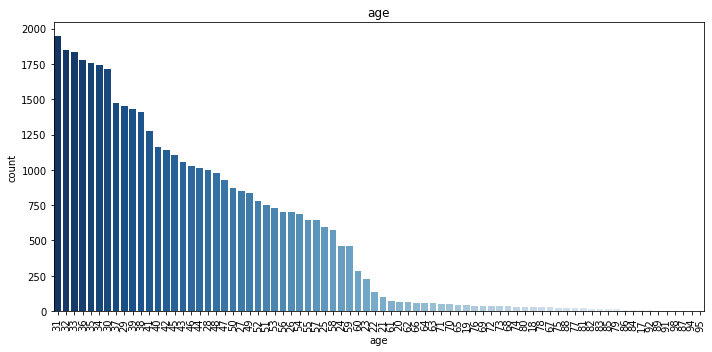

In [15]:
# plot age
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["age"],
    # order by frequency
    order = df["age"].value_counts().sort_values(ascending = False).index,
    palette = "Blues_r"
)
plt.title("age", fontweight = 25)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Categorical Feature

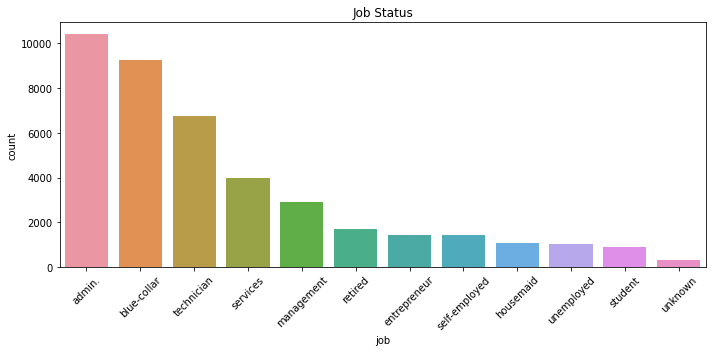

In [16]:
# plot job
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["job"],
    # order by frequency
    order = df["job"].value_counts().sort_values(ascending = False).index,
)
plt.title("Job Status", fontweight = 20)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

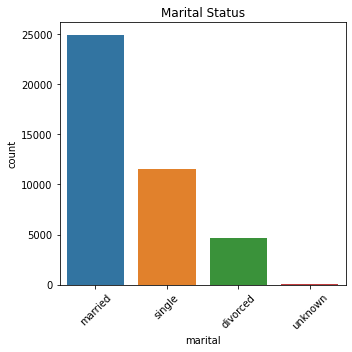

In [17]:
# plot marital
plt.figure(figsize = (5,5))
sns.countplot(
    x = df["marital"],
    # order by frequency
    order = df["marital"].value_counts().sort_values(ascending = False).index
) 
plt.title("Marital Status", fontweight = 20)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

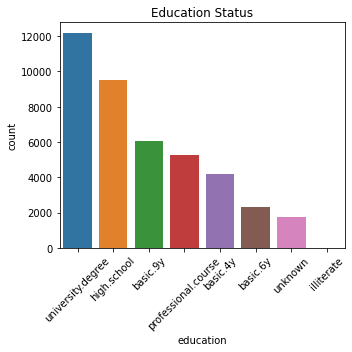

In [18]:
# plot marital
plt.figure(figsize = (5,5))
sns.countplot(
    x = df["education"],
    # order by frequency
    order = df["education"].value_counts().sort_values(ascending = False).index
) 
plt.title("Education Status", fontweight = 20)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

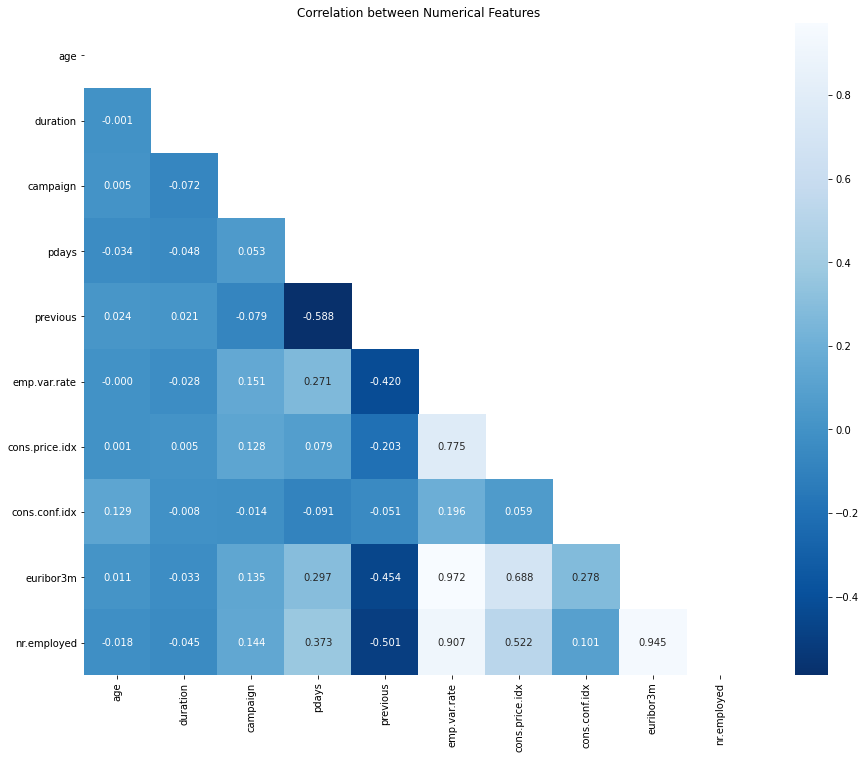

In [19]:
corr_ = df[num_cols].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_))

plt.figure(figsize = (15, 12))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Blues_r'
)
plt.title("Correlation between Numerical Features")
plt.yticks(rotation=0)
plt.show()

In [20]:
highly_correlated = corr_.round(decimals = 3)[corr_.round(decimals = 3)> 0.7].dropna(axis=0, how="all").dropna(axis=1, how="all")
highly_correlated

,emp.var.rate,euribor3m
cons.price.idx,0.775,NaN
euribor3m,0.972,NaN
nr.employed,0.907,0.945


# Data Preprocessing

In [21]:
highly_correlated

,emp.var.rate,euribor3m
cons.price.idx,0.775,NaN
euribor3m,0.972,NaN
nr.employed,0.907,0.945


In [22]:
df.drop(columns = list(highly_correlated.columns), inplace = True)

In [23]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0,0


In [24]:
df[cat_cols].head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent


In [25]:
df[cat_cols].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [26]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [27]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [28]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [29]:
job_dummies = pd.get_dummies(df['job'], prefix = 'job', drop_first=True)
df = pd.concat([df, job_dummies], axis = 1)

In [30]:
df.loc[:, df.columns.str.contains('job')].head(3)

,job,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,housemaid,0,0,1,0,0,0,0,0,0,0,0
1,services,0,0,0,0,0,0,1,0,0,0,0
2,services,0,0,0,0,0,0,1,0,0,0,0


In [31]:
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital', drop_first=True)
df = pd.concat([df, marital_dummies], axis = 1)

In [32]:
df.loc[:, df.columns.str.contains('marital')].head(3)

,marital,marital_married,marital_single,marital_unknown
0,married,1,0,0
1,married,1,0,0
2,married,1,0,0


In [33]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education', drop_first=True)
df = pd.concat([df, education_dummies], axis = 1)

In [34]:
df.loc[:, df.columns.str.contains('education')].head(3)

,education,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,basic.4y,0,0,0,0,0,0,0
1,high.school,0,0,1,0,0,0,0
2,high.school,0,0,1,0,0,0,0


In [35]:
default_dummies = pd.get_dummies(df['default'], prefix = 'default', drop_first=True)
df = pd.concat([df, default_dummies], axis = 1)

In [36]:
df.loc[:, df.columns.str.contains('default')].head(3)

,default,default_unknown,default_yes
0,no,0,0
1,unknown,1,0
2,no,0,0


In [37]:
housing_dummies = pd.get_dummies(df['housing'], prefix = 'housing', drop_first=True)
df = pd.concat([df, housing_dummies], axis = 1)

In [38]:
df.loc[:, df.columns.str.contains('housing')].head(3)

,housing,housing_unknown,housing_yes
0,no,0,0
1,no,0,0
2,yes,0,1


In [39]:
loan_dummies = pd.get_dummies(df['loan'], prefix = 'loan', drop_first=True)
df = pd.concat([df, loan_dummies], axis = 1)

In [40]:
df.loc[:, df.columns.str.contains('loan')].head(5)

,loan,loan_unknown,loan_yes
0,no,0,0
1,no,0,0
2,no,0,0
3,no,0,0
4,yes,0,1


In [41]:
df.drop(columns = cat_cols, inplace = True)

In [42]:
df.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
duration,261.000,149.000,226.000,151.000,307.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000
job_blue-collar,0.000,0.000,0.000,0.000,0.000


In [43]:
X = df.drop(columns = ["y"])
y = df["y"]

In [44]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 42)

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train_trf = scaler.transform(X_train)
X_val_trf = scaler.transform(X_val)
X_test_trf = scaler.transform(X_test)

# Model

In [47]:
models_dict={}

### Logistic Regression

In [48]:
# LogisticRegression dengan solver lbfgs
models_dict["LogReg_lbfgs"]= LogisticRegression(solver='lbfgs',random_state=69)
# LogisticRegression dengan solver liblinear
models_dict["LogReg_liblinear"]= LogisticRegression(solver='liblinear',random_state=69)
# LogisticRegression dengan solver saga
models_dict["LogReg_saga"]= LogisticRegression(solver='saga',random_state=69)
# LogisticRegression dengan solver newton-cg
models_dict["LogReg_newton-cg"]= LogisticRegression(solver='newton-cg',random_state=69)
# LogisticRegression dengan solver saga
models_dict["LogReg_sag"]= LogisticRegression(solver='sag',random_state=69)

### SVM

In [49]:
models_dict["SVC_rbf"]= SVC(kernel='rbf', random_state=69,C=10)
models_dict["SVC_rbf2"]= SVC(kernel='rbf', random_state=69,C=0.1)
models_dict["SVC_poly"]= SVC(kernel='poly',degree=4, random_state=69,C=10)
models_dict["SVC_poly2"]= SVC(kernel='poly',degree=4, random_state=69,C=0.1)
models_dict["SVC_sigmoid"]= SVC(kernel='sigmoid',degree=4, random_state=69,C=10)
models_dict["SVC_sigmoid2"]= SVC(kernel='sigmoid',degree=4, random_state=69,C=0.1)

### Decision Tree

In [50]:
models_dict['tree_clf'] = DecisionTreeClassifier(max_depth=2, random_state=42)
models_dict['tree_reg'] = DecisionTreeRegressor(max_depth=2, random_state=42)

### Random Forest

In [51]:
models_dict['rnd_clf'] = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

### KNN Classifier

In [55]:
from sklearn.metrics import classification_report
models_dict['KNeighbors'] = KNeighborsClassifier(n_neighbors=5)
models_dict['KNeighbors'].fit(X_train_trf, y_train)
y_val_predict =models_dict['KNeighbors'].predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7285
           1       0.60      0.33      0.43       953

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.69      8238
weighted avg       0.88      0.90      0.88      8238



### Another Algoritm

In [56]:
from sklearn.neighbors import NearestCentroid
models_dict['Nearest_Centroid'] = NearestCentroid()

### Naive Bayes

In [53]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB
models_dict['Bernoulli'] = BernoulliNB()
models_dict['Gaussian'] = GaussianNB()

### Test Accuracy

In [ ]:
models_dict["LogReg_liblinear"]= LogisticRegression(solver='liblinear',random_state=69)
models_dict["LogReg_liblinear"].fit(X_train_trf, y_train)
y_pred_train = models_dict['LogReg_liblinear'].predict(X_train)
print('Training-set accuracy score: {0:0.8f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.88720474


In [ ]:
print('Test set score: {:.4f}'.format(models_dict['LogReg_liblinear'].score(X_test, y_test)))

Test set score: 0.8941


### Model Training

In [ ]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train_trf, y_train)

Training model LogReg_lbfgs
CPU times: user 229 ms, sys: 121 ms, total: 350 ms
Wall time: 188 ms
Training model LogReg_liblinear
CPU times: user 263 ms, sys: 106 ms, total: 370 ms
Wall time: 272 ms
Training model LogReg_saga
CPU times: user 1.19 s, sys: 2.77 ms, total: 1.19 s
Wall time: 1.19 s
Training model LogReg_newton-cg
CPU times: user 577 ms, sys: 190 ms, total: 768 ms
Wall time: 395 ms
Training model LogReg_sag
CPU times: user 867 ms, sys: 88 ms, total: 955 ms
Wall time: 852 ms
Training model SVC_linear
CPU times: user 1h 50min 8s, sys: 4.24 s, total: 1h 50min 12s
Wall time: 1h 49min 43s
Training model SVC_linear2
CPU times: user 32 s, sys: 60 ms, total: 32 s
Wall time: 31.9 s
Training model SVC_rbf
CPU times: user 41.3 s, sys: 84 ms, total: 41.4 s
Wall time: 41.2 s
Training model SVC_rbf2
CPU times: user 18.6 s, sys: 77 ms, total: 18.7 s
Wall time: 18.6 s
Training model SVC_poly
CPU times: user 59.2 s, sys: 100 ms, total: 59.3 s
Wall time: 59 s
Training model SVC_poly2
CPU time

### Model Validation

In [ ]:
train_prediction_results = []
val_prediction_results = []
train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Validation on {model_name}")
    # predict x val
    model_pred_val = model.predict(X_val_trf)
    
    # append result to list
    val_prediction_results.append(model_pred_val)
    
    model_pred_train = model.predict(X_train_trf)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model Validation on LogReg_lbfgs
elapsed time: 9.19 ms
Model Validation on LogReg_liblinear
elapsed time: 3.34 ms
Model Validation on LogReg_saga
elapsed time: 3.08 ms
Model Validation on LogReg_newton-cg
elapsed time: 2.97 ms
Model Validation on LogReg_sag
elapsed time: 2.73 ms
Model Validation on SVC_linear
elapsed time: 8216.36 ms
Model Validation on SVC_linear2
elapsed time: 8127.22 ms
Model Validation on SVC_rbf
elapsed time: 16610.76 ms
Model Validation on SVC_rbf2
elapsed time: 16946.74 ms
Model Validation on SVC_poly
elapsed time: 10688.08 ms
Model Validation on SVC_poly2
elapsed time: 11120.54 ms
Model Validation on SVC_sigmoid
elapsed time: 11340.07 ms
Model Validation on SVC_sigmoid2
elapsed time: 15415.0 ms
Model Validation on tree_clf
elapsed time: 5.96 ms
Model Validation on tree_reg
elapsed time: 4.43 ms
Model Validation on rnd_clf
elapsed time: 1149.68 ms
Model Validation on KNeighbors
elapsed time: 64327.58 ms
Model Validation on Nearest_Centroid
elapsed time: 13.93 ms

### Cross Validation

In [54]:
for model_name, model in models_dict.items():
    print(f"Cross Validation {model_name}")
    model.fit(X_train_trf, y_train)
    cross_value =np.mean(cross_val_score(model, X, y))
    print(cross_value)

Cross Validation LogReg_lbfgs


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8753746698579941
Cross Validation LogReg_liblinear
0.8636471168249024
Cross Validation LogReg_saga


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8954058751652718
Cross Validation LogReg_newton-cg


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

0.8505597658679417
Cross Validation LogReg_sag


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.8940704581377329
Cross Validation SVC_rbf
0.8681635923953885
Cross Validation SVC_rbf2
0.8973490196341963
Cross Validation SVC_poly
0.8599323842762908
Cross Validation SVC_poly2
0.8966448620930498
Cross Validation SVC_sigmoid
0.8810575054623436
Cross Validation SVC_sigmoid2
0.8873458284837543
Cross Validation tree_clf
0.7858040050043323
Cross Validation tree_reg
0.11176465043385427
Cross Validation rnd_clf
0.7870670486143931
Cross Validation Nearest_Centroid
0.8702762978634618
Cross Validation Bernoulli
0.8712962222019245
Cross Validation Gaussian
0.798333442534519


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
svc = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
GridSearchCV = GridSearchCV(models_dict["SVC_linear"], parameters)
GridSearchCV.fit(X,y)
sorted(GridSearchCV.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

# Model Inference

In [ ]:
import time
test_prediction_results = []
test_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model Inference on {model_name}")
    # predict x val
    model_pred = model.predict(X_test_trf)
    
    # append result to list
    test_prediction_results.append(model_pred)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    test_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model Inference on LogReg_lbfgs
elapsed time: 2.92 ms
Model Inference on LogReg_liblinear
elapsed time: 0.82 ms
Model Inference on LogReg_saga
elapsed time: 0.77 ms
Model Inference on LogReg_newton-cg
elapsed time: 0.76 ms
Model Inference on LogReg_sag
elapsed time: 1.12 ms
Model Inference on SVC_linear
elapsed time: 953.5 ms
Model Inference on SVC_linear2
elapsed time: 920.08 ms
Model Inference on SVC_rbf
elapsed time: 1866.57 ms
Model Inference on SVC_rbf2
elapsed time: 1933.68 ms
Model Inference on SVC_poly
elapsed time: 1216.5 ms
Model Inference on SVC_poly2
elapsed time: 1249.44 ms
Model Inference on SVC_sigmoid
elapsed time: 1285.22 ms
Model Inference on SVC_sigmoid2
elapsed time: 1737.95 ms
Model Inference on tree_clf
elapsed time: 1.05 ms
Model Inference on tree_reg
elapsed time: 0.77 ms
Model Inference on rnd_clf
elapsed time: 162.85 ms
Model Inference on KNeighbors
elapsed time: 7474.03 ms
Model Inference on Nearest_Centroid
elapsed time: 3.69 ms
Model Inference on Bernoulli


# Model Analysis


In [ ]:
from sklearn.metrics import classification_report
for model_name, model in models_dict.items():
    print("Performance Evaluation {0}".format(model_name))
    model.fit(X_train_trf, y_train)
    %time y_val_predict = model.predict(X_val_trf)
    print(classification_report(y_val, y_val_predict,normalize=False))

Performance Evaluation LogReg_lbfgs
CPU times: user 1.52 ms, sys: 0 ns, total: 1.52 ms
Wall time: 771 µs
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7285
           1       0.70      0.41      0.52       953

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Performance Evaluation LogReg_liblinear
CPU times: user 888 µs, sys: 1e+03 µs, total: 1.89 ms
Wall time: 1.46 ms
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7285
           1       0.70      0.41      0.52       953

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Performance Evaluation LogReg_saga
CPU times: user 2.02 ms, sys: 0 ns, total: 2.02 ms
Wall time: 1.76 ms
              precision

ValueError: ignored